# This notebook contains some exploratory data analysis for tweets by the 45th POTUS, Donald J. Trump

Data obtained from:
* http://www.trumptwitterarchive.com/

In [51]:
import pandas as pd
import numpy as np

import re

from matplotlib import pyplot as plt
import seaborn as sns

# NLP
from nltk import tokenize
from nltk.corpus import stopwords

# For Wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [47]:
# Read the data
df = pd.read_json('data/trump_tweets.json')

# Display the first five entries
df.head(n=5)

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,"STRONG &amp; UNITED, WE WILL PREVAIL! https://...",2020-03-18 21:48:42+00:00,15974,60550,False,1240394725783416832
1,Twitter for iPhone,I only signed the Defense Production Act to co...,2020-03-18 21:37:22+00:00,15408,73438,False,1240391871026864128
2,Twitter for iPhone,Thank you @HerschelWalker! https://t.co/qBXOa4...,2020-03-18 20:50:43+00:00,5785,24060,False,1240380132226928640
3,Twitter for iPhone,Today I spoke with American physicians and nur...,2020-03-18 20:49:33+00:00,16274,81844,False,1240379840987115520
4,Twitter for iPhone,I want all Americans to understand: we are at ...,2020-03-18 19:14:46+00:00,29725,145933,False,1240355985673392128


In [50]:
df.head(n=20)

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,"STRONG &amp; UNITED, WE WILL PREVAIL! https://...",2020-03-18 21:48:42+00:00,15974,60550,False,1240394725783416832
1,Twitter for iPhone,I only signed the Defense Production Act to co...,2020-03-18 21:37:22+00:00,15408,73438,False,1240391871026864128
2,Twitter for iPhone,Thank you @HerschelWalker! https://t.co/qBXOa4...,2020-03-18 20:50:43+00:00,5785,24060,False,1240380132226928640
3,Twitter for iPhone,Today I spoke with American physicians and nur...,2020-03-18 20:49:33+00:00,16274,81844,False,1240379840987115520
4,Twitter for iPhone,I want all Americans to understand: we are at ...,2020-03-18 19:14:46+00:00,29725,145933,False,1240355985673392128
5,Twitter for iPhone,...It cannot overcome the dedication of our do...,2020-03-18 19:14:46+00:00,15343,76364,False,1240355986541613056
6,Twitter for iPhone,"RT @CDCgov: If you get sick, remember: #Antibi...",2020-03-18 18:41:02+00:00,5060,0,True,1240347498797031424
7,Twitter for iPhone,15 DAYS TO SLOW THE SPREAD! https://t.co/ytgBP...,2020-03-18 18:40:10+00:00,19596,65611,False,1240347278453411840
8,Twitter for iPhone,RT @WhiteHouse: LIVE: Press Briefing with Coro...,2020-03-18 16:08:19+00:00,8478,0,True,1240309065374457856
9,Twitter for iPhone,Thank you to our great American businesses for...,2020-03-18 15:45:55+00:00,13109,63782,False,1240303426254372864


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9961 entries, 0 to 9960
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   source          9961 non-null   object             
 1   text            9961 non-null   object             
 2   created_at      9961 non-null   datetime64[ns, UTC]
 3   retweet_count   9961 non-null   int64              
 4   favorite_count  9961 non-null   int64              
 5   is_retweet      9961 non-null   bool               
 6   id_str          9961 non-null   int64              
dtypes: bool(1), datetime64[ns, UTC](1), int64(3), object(2)
memory usage: 476.8+ KB


## Great! We see that the data was read in good fomrating, that is the timestamp is a datetime object, retween and favofite counts are integers, is_retweet boolean and the tweet string is there

In [125]:
# See the most popular tweets
df.sort_values(by='favorite_count',ascending=False).head(n=10)

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,words
6874,Twitter for iPhone,A$AP Rocky released from prison and on his way...,2019-08-02 17:41:30+00:00,251530,879647,False,1157345692517634048,"[a, ap, rocky, released, from, prison, and, on..."
2366,Twitter for iPhone,https://t.co/VXeKiVzpTf,2020-01-03 02:32:53+00:00,172157,814012,False,1212924762827046912,[]
2283,Twitter for iPhone,All is well! Missiles launched from Iran at tw...,2020-01-08 02:45:24+00:00,158004,764333,False,1214739853025394688,"[all, is, well, missiles, launched, from, iran..."
2564,Twitter for iPhone,MERRY CHRISTMAS!,2019-12-25 12:26:31+00:00,115372,735775,False,1209812664601522176,"[merry, christmas]"
1619,Twitter for iPhone,"Kobe Bryant, despite being one of the truly gr...",2020-01-26 23:54:34+00:00,94246,735478,False,1221582230008619008,"[kobe, bryant, despite, being, one, of, the, t..."
7166,Twitter for iPhone,Just spoke to @KanyeWest about his friend A$AP...,2019-07-19 20:01:47+00:00,210186,734567,False,1152307567634391040,"[just, spoke, to, kanyewest, about, his, frien..."
3565,Twitter for iPhone,https://t.co/11nzKwOCtU,2019-11-27 15:54:39+00:00,201773,700861,False,1199718185865535488,[]
2326,Twitter for iPhone,The United States just spent Two Trillion Doll...,2020-01-05 05:11:03+00:00,146706,684981,False,1213689342272659456,"[the, united, states, just, spent, two, trilli..."
128,Twitter for iPhone,THE UNITED STATES LOVES ITALY! https://t.co/DE...,2020-03-14 17:31:56+00:00,111659,628164,False,1238880558052257792,"[the, united, states, loves, italy]"
2387,Twitter for iPhone,HAPPY NEW YEAR!,2020-01-01 01:30:35+00:00,85409,576045,False,1212184310389850112,"[happy, new, year]"


## Let's clean the data by doing the following:
* Remove strings that start with `http`
* Get rid of retweets for now
* We considere retweets those that start with `RT`: It seems like self-retweets are not considered as retweets (but we want to do so)
* Remove the ampersands

### The tokenization will take care of the rest of the cleanup

In [129]:
# Get rid of the retweets


for index, row in df.iterrows():
    if (row['text'][:2] == 'RT') and (not(row['is_retweet'])):
        df.loc[index,'is_retweet'] = True
#         print(row['text'][:200],row['is_retweet'], row['id_str'])
#         count += 1
#         print(count)
    
#     df.loc[index]

# df.loc[df['text']=='RT.*']

In [104]:
print(df.loc[9957])
print(df.loc[9957,'text'][:2])



# print(re.sub("http.*s?", "", df.loc[4438,'text']))

# print(re.sub("&.*amp;?", "AND", df.loc[0,'text']))

source                                           Twitter for iPhone
text              RT @realDonaldTrump: To all of the great peopl...
created_at                                2019-01-21 15:41:23+00:00
retweet_count                                                 39614
favorite_count                                                    0
is_retweet                                                    False
id_str                                          1087374608922230784
words             [rt, realdonaldtrump, to, all, of, the, great,...
Name: 9957, dtype: object
RT


## Tokenize and clean up text

In [157]:
def token_text(text):
    """
    Tokenize and cleanup text
    """
    # Remove hyperlinks
    text = re.sub("http.*s?", "", text)
    
    # Remove ampersand (which is in text) and replace it with 'AND'
    text = re.sub("&.*amp;?", "AND", text)
    
    # Split into words using NLTK's word tokenizer
    words = tokenize.word_tokenize(text)
    
    # Convert to lowercase and remove punctuation signs 
    words = [w.lower() for w in words if w.isalpha()]

    return words

def token_text_caps(text):
    """
    Tokenize for ALL CAPS -> Trump tweets
    """
    # Remove hyperlinks
    text = re.sub("http.*s?", "", text)
    
    # Remove ampersand (which is in text) and replace it with 'AND'
    text = re.sub("&.*amp;?", "AND", text)
    
    # Split into words using NLTK's word tokenizer
    words = tokenize.word_tokenize(text)
    
    # Convert to lowercase and remove punctuation signs 
    words = [w for w in words if (w.isalpha() and w.isupper())]

    return words

In [158]:
df['words'] = df.text.apply(token_text)
df['words_caps'] = df.text.apply(token_text_caps)

In [159]:
df.head(n=20)

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,words,words_caps
0,Twitter for iPhone,"STRONG &amp; UNITED, WE WILL PREVAIL! https://...",2020-03-18 21:48:42+00:00,15974,60550,False,1240394725783416832,"[strong, and, united, we, will, prevail]","[STRONG, AND, UNITED, WE, WILL, PREVAIL]"
1,Twitter for iPhone,I only signed the Defense Production Act to co...,2020-03-18 21:37:22+00:00,15408,73438,False,1240391871026864128,"[i, only, signed, the, defense, production, ac...","[I, TOGETHER]"
2,Twitter for iPhone,Thank you @HerschelWalker! https://t.co/qBXOa4...,2020-03-18 20:50:43+00:00,5785,24060,False,1240380132226928640,"[thank, you, herschelwalker]",[]
3,Twitter for iPhone,Today I spoke with American physicians and nur...,2020-03-18 20:49:33+00:00,16274,81844,False,1240379840987115520,"[today, i, spoke, with, american, physicians, ...","[I, HEROES, WIN]"
4,Twitter for iPhone,I want all Americans to understand: we are at ...,2020-03-18 19:14:46+00:00,29725,145933,False,1240355985673392128,"[i, want, all, americans, to, understand, we, ...",[I]
5,Twitter for iPhone,...It cannot overcome the dedication of our do...,2020-03-18 19:14:46+00:00,15343,76364,False,1240355986541613056,"[it, can, not, overcome, the, dedication, of, ...","[LOVE, PATRIOTISM, DETERMINATION, WE, WILL, PR..."
6,Twitter for iPhone,"RT @CDCgov: If you get sick, remember: #Antibi...",2020-03-18 18:41:02+00:00,5060,0,True,1240347498797031424,"[rt, cdcgov, if, you, get, sick, remember, ant...","[RT, NOT]"
7,Twitter for iPhone,15 DAYS TO SLOW THE SPREAD! https://t.co/ytgBP...,2020-03-18 18:40:10+00:00,19596,65611,False,1240347278453411840,"[days, to, slow, the, spread]","[DAYS, TO, SLOW, THE, SPREAD]"
8,Twitter for iPhone,RT @WhiteHouse: LIVE: Press Briefing with Coro...,2020-03-18 16:08:19+00:00,8478,0,True,1240309065374457856,"[rt, whitehouse, live, press, briefing, with, ...","[RT, LIVE]"
9,Twitter for iPhone,Thank you to our great American businesses for...,2020-03-18 15:45:55+00:00,13109,63782,False,1240303426254372864,"[thank, you, to, our, great, american, busines...",[]


In [164]:
def plot_wordcloud(words, ax=None, title=''):
    """Convenient function to generate and plot wordcloud from list of words"""
    if ax is None: fig, ax = plt.subplots(figsize=(20,15))
    # Generate wordcloud and plot
    wordcloud = WordCloud(background_color='white', width=1000, height=600).generate(' '.join(words))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_axis_off()
    ax.set_title(title)
    return ax, wordcloud

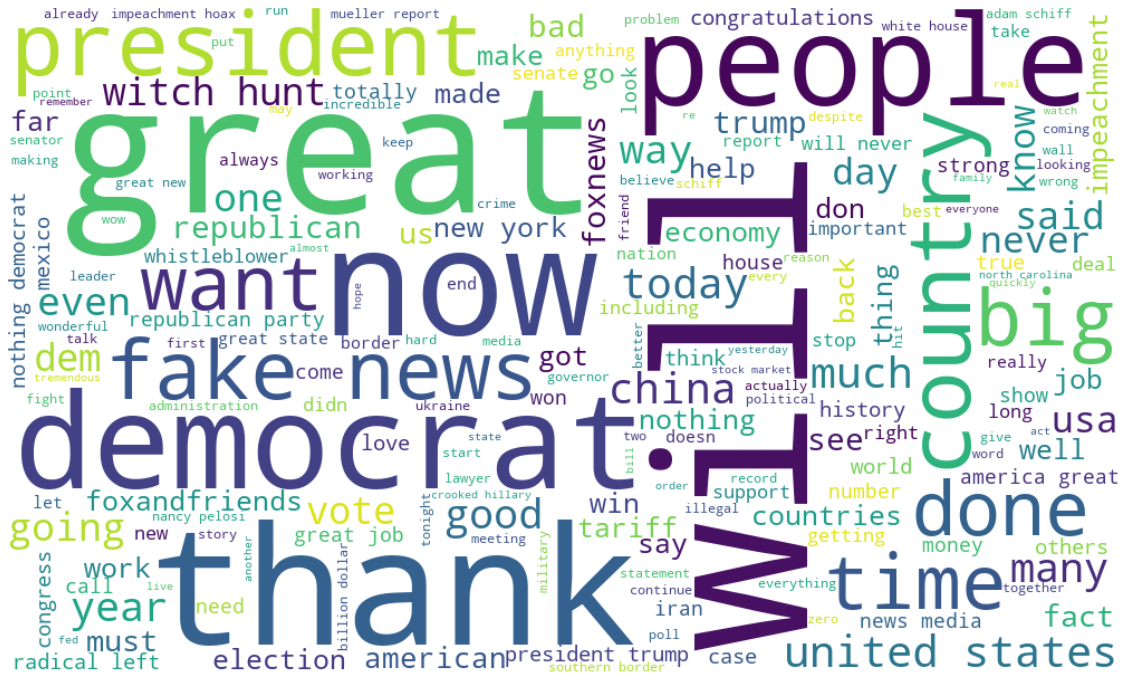

In [175]:
ax, wordcloud = plot_wordcloud(df[df['is_retweet']==False].words.sum())
plt.savefig('img/trump_tweets.png', bbox_inches='tight')

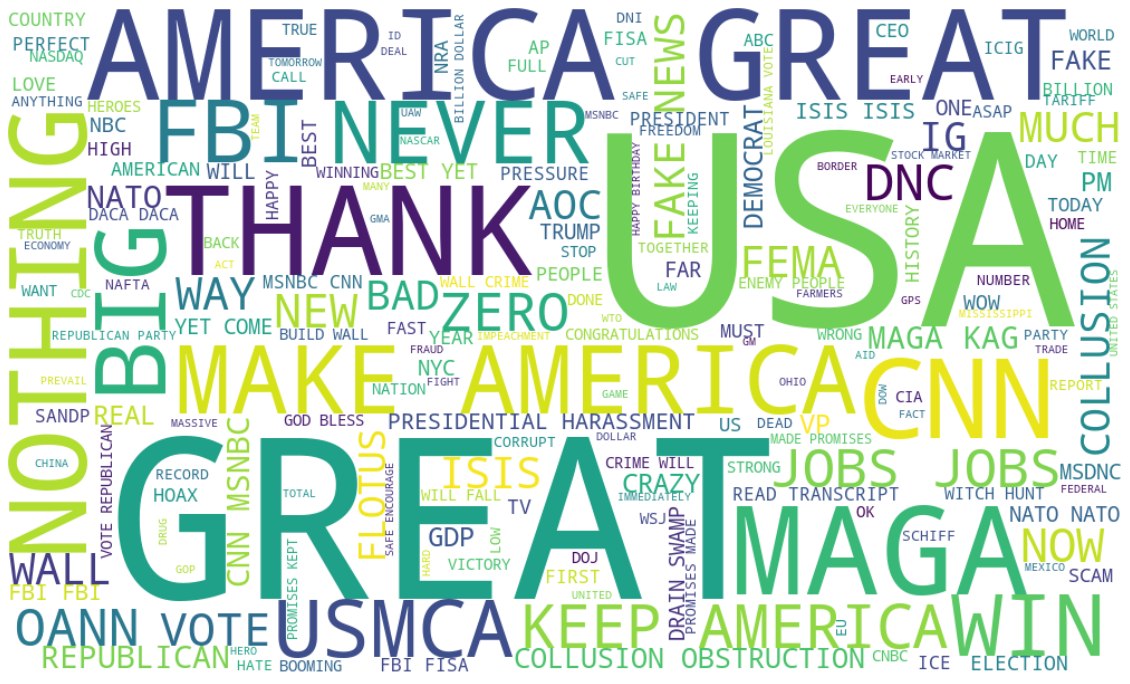

In [176]:
ax, wordcloud = plot_wordcloud(df[df['is_retweet']==False].words_caps.sum())
plt.savefig('img/trump_tweets_caps.png', bbox_inches='tight')

In [167]:
# wordcloud.words_